In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import re
import nltk
from nltk.corpus import stopwords

In EDA.ipynb we tried to explore the dataset with preliminary analysis. Now, we are delving more into the contents of the dataset. 

In [101]:
from collections import Counter

In [79]:
df = pd.read_csv('bills_cleaned.csv')

In [3]:
df.head()

,Title,BillNumber,DocketNumber,GeneralCourtNumber,PrimarySponsor,Cosponsors,BillHistory,LegislationTypeName,Pinslip,DocumentText,CommitteeRecommendations
0,An Act relative to the recovery of overearnings,H10,HD10,193.0,"{'Id': None, 'Name': 'Public Employee Retireme...",[],http://malegislature.gov/api/GeneralCourts/193...,Bill,So much of the recommendations of the Public E...,\tParagraph (c) of Section 91 of chapter 32 of...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ..."
1,An Act relative to buffer zones on land under ...,H100,HD992,193.0,"{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III', ...","[{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III',...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Schmid of Westport, a petiti...",\tSECTION 1. Chapter 20 Section 23 of the Gene...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ..."
2,An Act providing living organ donor protections,H1000,HD941,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 26 of the General Laws is...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ..."
3,An Act relative to step therapy and in vitro f...,H1001,HD952,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 32A of the General Laws i...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ..."
4,An Act relative to children's auditory health,H1002,HD2355,193.0,"{'Id': 'PJD2', 'Name': 'Peter J. Durant', 'Typ...","[{'Id': 'PJD2', 'Name': 'Peter J. Durant', 'Ty...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Durant of Spencer, a petitio...",\tSECTION 1. Section 23 of chapter 32A of the ...,"[{'Action': 'Accompanied', 'FiscalAmounts': []..."


In [4]:
df.columns

Index(['Title', 'BillNumber', 'DocketNumber', 'GeneralCourtNumber',
       'PrimarySponsor', 'Cosponsors', 'BillHistory', 'LegislationTypeName',
       'Pinslip', 'DocumentText', 'CommitteeRecommendations'],
      dtype='object')

In [81]:

df["TitleLength"]=df["Title"].apply(lambda x: len(x.split()))

In [4]:
df.head()

,Title,BillNumber,DocketNumber,GeneralCourtNumber,PrimarySponsor,Cosponsors,BillHistory,LegislationTypeName,Pinslip,DocumentText,CommitteeRecommendations,TitleLength
0,An Act relative to the recovery of overearnings,H10,HD10,193.0,"{'Id': None, 'Name': 'Public Employee Retireme...",[],http://malegislature.gov/api/GeneralCourts/193...,Bill,So much of the recommendations of the Public E...,\tParagraph (c) of Section 91 of chapter 32 of...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",8
1,An Act relative to buffer zones on land under ...,H100,HD992,193.0,"{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III', ...","[{'Id': 'PAS1', 'Name': 'Paul A. Schmid, III',...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Schmid of Westport, a petiti...",\tSECTION 1. Chapter 20 Section 23 of the Gene...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",12
2,An Act providing living organ donor protections,H1000,HD941,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 26 of the General Laws is...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",7
3,An Act relative to step therapy and in vitro f...,H1001,HD952,193.0,"{'Id': 'WJD1', 'Name': 'William J. Driscoll, J...","[{'Id': 'WJD1', 'Name': 'William J. Driscoll, ...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Driscoll of Milton, a petiti...",\tSECTION 1. Chapter 32A of the General Laws i...,"[{'Action': 'Favorable', 'FiscalAmounts': [], ...",12
4,An Act relative to children's auditory health,H1002,HD2355,193.0,"{'Id': 'PJD2', 'Name': 'Peter J. Durant', 'Typ...","[{'Id': 'PJD2', 'Name': 'Peter J. Durant', 'Ty...",http://malegislature.gov/api/GeneralCourts/193...,Bill,"By Representative Durant of Spencer, a petitio...",\tSECTION 1. Section 23 of chapter 32A of the ...,"[{'Action': 'Accompanied', 'FiscalAmounts': []...",7


In [5]:
print(f"Minimum Title length is {df['TitleLength'].min()}")
print(f"Maximum Title length is {df['TitleLength'].max()}")
print(f"Mean Title length is {int(df['TitleLength'].mean())}")
print(f"Standart Deviation of Title's length is {int(df['TitleLength'].std())}")

Minimum Title length is 2
Maximum Title length is 71
Mean Title length is 11
Standart Deviation of Title's length is 4


Text(0.5, 1.0, 'Distribution of Title Length')

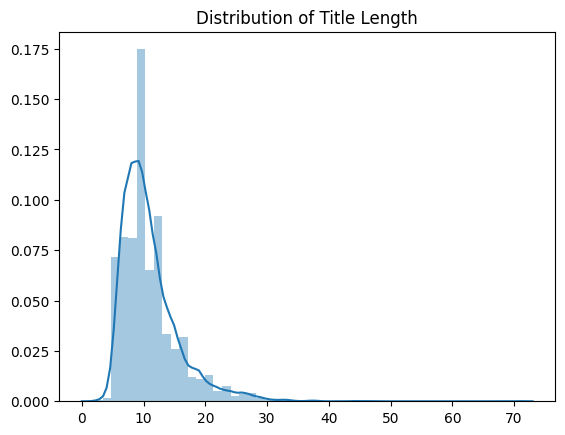

In [23]:
sns.distplot(df["TitleLength"].values)
plt.title('Distribution of Title Length')

The line here represents the kernel density estimates (KDEs)

In [71]:
df["DocumentTextLength"]=df["DocumentText"].apply(lambda x: len(x.split()))

In [9]:
print(f"Minimum DocumentText length is {df['DocumentTextLength'].min()}")
print(f"Maximum DocumentText length is {df['DocumentTextLength'].max()}")
print(f"Mean DocumentText length is {int(df['DocumentTextLength'].mean())}")
print(f"Standart Deviation of DocumentText's length is {int(df['DocumentTextLength'].std())}")

Minimum DocumentText length is 9
Maximum DocumentText length is 33945
Mean DocumentText length is 788
Standart Deviation of DocumentText's length is 1784


Text(0.5, 1.0, 'Distribution of DocumentText Length')

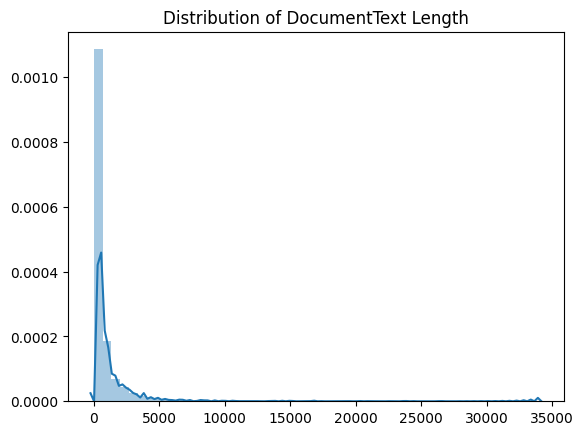

In [24]:
sns.distplot(df['DocumentTextLength'].values)
plt.title('Distribution of DocumentText Length')

In [14]:
LegislationTypeName_keys=list(df['LegislationTypeName'].value_counts().keys())
LegislationTypeName_values=list(df['LegislationTypeName'].value_counts().values)

print(LegislationTypeName_keys)
print(LegislationTypeName_values)

['Bill', 'Resolve', 'Extension Order', 'Order', 'Amendment', 'Proposal for Constitutional Amendment', 'Resolution', "Governor's Message (Communication)", 'ReOrg Plan', 'Resolution (Ceremonial)', "Governor's Message (Veto)"]
[6745, 82, 61, 37, 27, 24, 20, 4, 1, 1, 1]


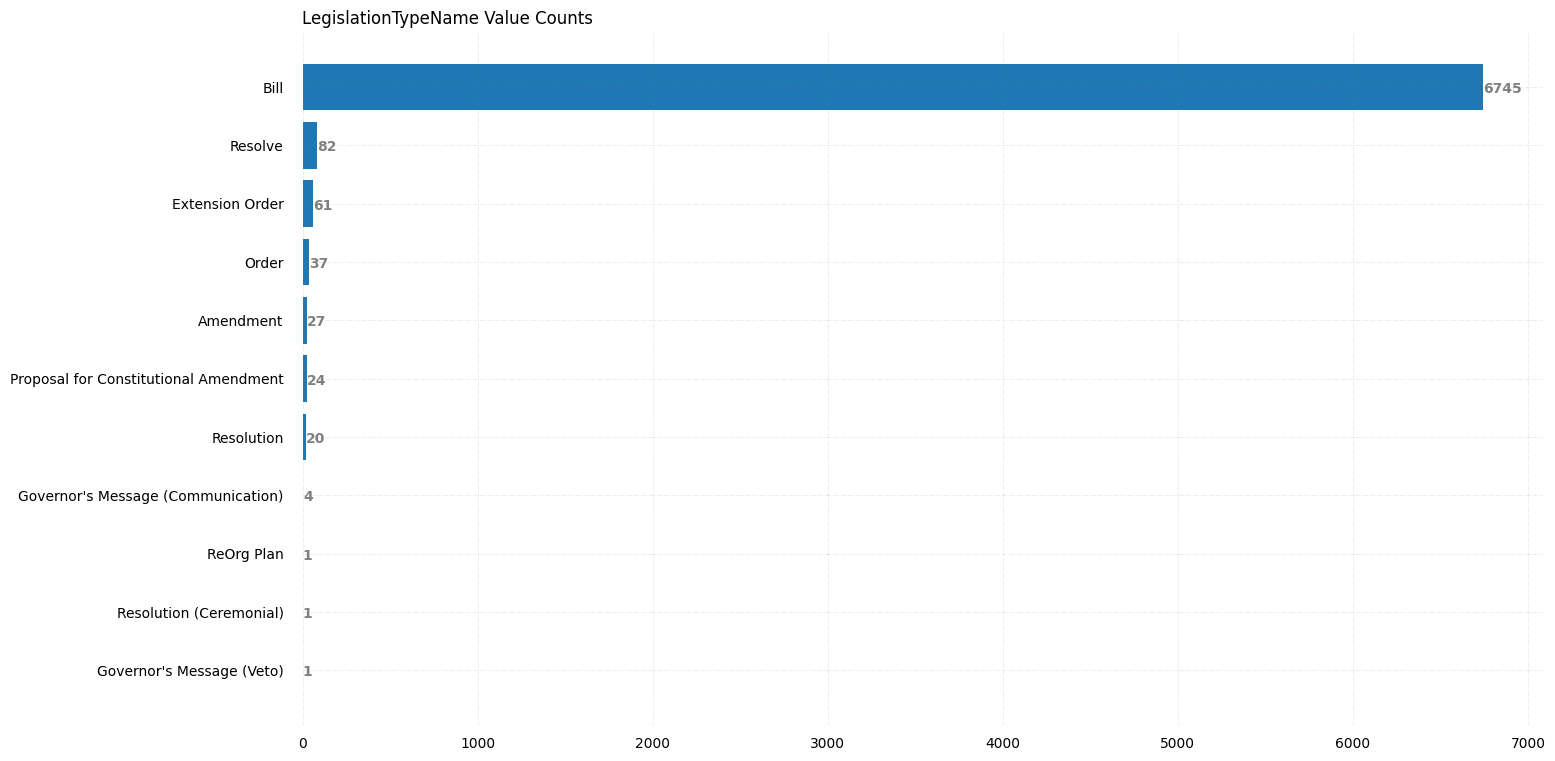

In [21]:
fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(LegislationTypeName_keys, LegislationTypeName_values)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)


ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set_title('LegislationTypeName Value Counts',
             loc ='left', )

fig.text(0.9, 0.15, '', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.show()

In [27]:
df['DocumentText'].iloc[0]

'\tParagraph (c) of Section 91 of chapter 32 of the general laws, as appearing in the 2020 Official edition, is hereby amended in line 120 by adding:\r\n\tIn the event that any excess is not recovered by the appropriate treasurer or other person responsible for the payment of the compensation, the retirement board of which the member is a retiree may recover an amount equal to the overearnings, but in no event shall such amount exceed the amount of the retirement allowance paid in the year in which the overearnings occurred.\r\n'

In [28]:
df['DocumentText'].iloc[100]

'\tSECTION 1.  Adult-use and medical dispensaries of cannabis products shall provide access to a medical professional for consultation purposes should the consumer request it.\r\n\tSECTION 2. This act shall take effect upon its passage.\r\n'

In [29]:
df['DocumentText'].iloc[1400]

'\tSECTION 1. Chapter 13 of the General Laws is hereby amended by striking out sections 12A to 12C, inclusive, and inserting in place thereof the following sections:- \r\n\tSection 12A. There shall be within the board of registration in medicine a board of registration in podiatry, to be appointed by the governor, in this and in the following two sections called the podiatry board, consisting of five members, citizens of the commonwealth, three of whom shall have had at least seven years of practice in podiatry in this commonwealth. The fourth member shall be a registered physician who shall have had at least seven years of practice in medicine in this commonwealth. The fifth member shall be a representative of the public, subject to the provisions of section nine B. No member of the board shall be connected in any way with a school of podiatry or be financially interested in any manufacturing, wholesale or retail business, pertaining to podiatry in any form whatsoever. As the term of 

In [82]:
def clean0(text):
    text=re.sub('\n','',text)
    text=re.sub('\r','',text)
    text=re.sub('\t','',text)
    return text

def clean1(text):
    return re.sub(r'\d+','',text)
    
def clean2(text):
    text=re.sub('[!"#$%&\(\)*+.,;<=>?@^_\[\]{|}~]', '',text)
    text=re.sub(' - *', '',text)
    return text


    


In [83]:
nltk.download('stopwords')
stp_wrds=stopwords.words('english')

def remove_stopwords(text):
    
    for word in stp_wrds:
        text=re.sub(f' {word} ', ' ',text)
        
    return text
    
    

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/canerozer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
#get rid of numbers 

df['cleaned_DocumentText']=df['DocumentText'].apply(clean1)

In [85]:
#lower them

df['cleaned_DocumentText']=df['cleaned_DocumentText'].apply(lambda x: x.lower())

In [86]:
#get rid of \r \n \t
df['cleaned_DocumentText']=df['cleaned_DocumentText'].apply(clean0)


In [87]:
#get rid of punctuation marks

df['cleaned_DocumentText']=df['cleaned_DocumentText'].apply(clean2)

In [88]:
#remove stop words

df['cleaned_DocumentText']=df['cleaned_DocumentText'].apply(remove_stopwords)



In [89]:
df['cleaned_DocumentText'].head()

0    paragraph c section  chapter  general laws app...
1    section  chapter  section  general laws appear...
2    section  chapter  general laws hereby amended ...
3    section  chapter general laws hereby amended i...
4    section  section  chapter general laws appeari...
Name: cleaned_DocumentText, dtype: object

In [90]:
cleaned_documenttext=list(df['cleaned_DocumentText'])



In [93]:
all_words=[ll for ll in cleaned_documenttext]

In [97]:
all_words=[text.split() for text in all_words]

In [99]:
all_words=[word for words in all_words for word in words]

In [107]:
count_values[:10]

[4827, 8156, 65243, 39906, 21046, 14616, 12073, 5946, 5101, 19861]

In [115]:
word_counts = Counter(all_words)

In [116]:
top10=word_counts.most_common(10)

In [117]:
top10

[('shall', 90455),
 ('section', 65243),
 ('chapter', 39906),
 ('following', 23171),
 ('general', 21046),
 ('amended', 21013),
 ('said', 20321),
 ('hereby', 19861),
 ('may', 19699),
 ('department', 16859)]

In [118]:
count_keys=[val[0] for val in top10]
count_values=[val[1] for val in top10]


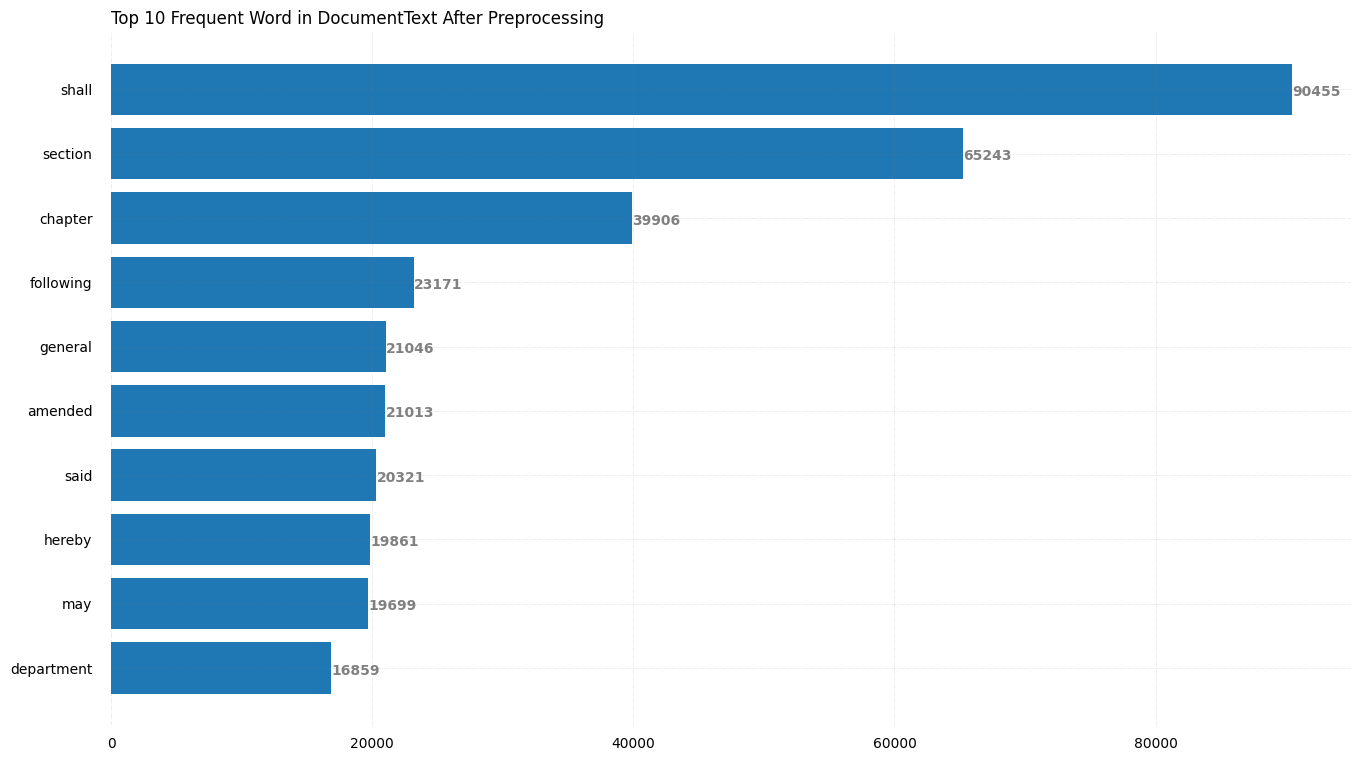

In [120]:
fig, ax = plt.subplots(figsize =(16, 9))

ax.barh(count_keys, count_values)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)


ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
ax.set_title('Top 10 Frequent Word in DocumentText After Preprocessing',
             loc ='left', )

fig.text(0.9, 0.15, '', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

plt.show()